In [8]:
import numpy as np
from scipy.stats import powerlaw, norm, uniform, poisson
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

In [113]:
exp = [[1, 0.9],
       [1,   2   ],
       [1,   4   ],
       [1,   10  ],
       [1,   40  ]]

Ks = [5, 10, 15, 20, 30, 50, 100]

mean_diffs = [0.5, 1, 2, 3, 4, 5, 6, 7, 8]


df = pd.DataFrame(columns = ['a0', 'a1', 'Mean difference', 'K','Emperical Error', 'Gaussian Error', 'Relative % Error'])

Ntrain = 10000                                   #training set
s0 = np.zeros(Ntrain)
s1 = np.zeros(Ntrain)
c0 = np.zeros(Ntrain)
c1 = np.zeros(Ntrain)

Ntest = 100000

test_s0 = np.zeros(Ntest)
test_s1 = np.zeros(Ntest)
test_c0 = np.zeros(Ntest)
test_c1 = np.zeros(Ntest)

count = 0
for a1, a0 in exp:
    for K in Ks:
        # Generate Training Data
        
        for i in range(Ntrain):
            s0[i] = np.sum(powerlaw.rvs(a0, size=K))               #Observation for hypothesis 0
            s1[i] = np.sum(powerlaw.rvs(a1, size=K))               #Observation hypothesis 1

        c0 = (s0 - np.mean(s0))/np.std(s0)                         #normalized random variable
        c1 = (s1 - np.mean(s1))/np.std(s1)                         #normalized random variable                     
            
        # Generate Test data
        
        for i in range(Ntest):
            test_s0[i] = np.sum(powerlaw.rvs(a0, size=K))              #Observation for hypothesis 0
            test_s1[i] = np.sum(powerlaw.rvs(a1, size=K))              #Observation hypothesis 1 
        
        test_c0 = (test_s0 - np.mean(test_s0))/(np.std(test_s0))       
        test_c1 = (test_s1 - np.mean(test_s1))/(np.std(test_s1))
            
        for mean_diff in mean_diffs:
            c0 = mean_diff + c0
            test_c0 = mean_diff + test_c0 
            
            Threshold = (mean_diff)/2
                
            Error = 0
            for i in range(Ntest):
                if test_c0[i] <= Threshold:
                    Error += 1
                if test_c1[i] > Threshold:
                    Error += 1 
            
            #Error = np.sum(test_c0 <= Threshold) + np.sum(test_c1[i] > Threshold)
            
            c0 = c0 - mean_diff
            test_c0 = test_c0 - mean_diff
            
            emprical_error = Error/(2*Ntest)
            gaussian_error = 1 - norm.cdf(mean_diff/2)
            percent_error = (emprical_error - gaussian_error)*100/gaussian_error
                
            #print("Empirical Error", emprical_error)
            #print("Gaussian Error: ", gaussian_error)
            #print("% error: ", percent_error)
            
            df.loc[count] = [a0, a1, mean_diff, K, emprical_error, gaussian_error, percent_error]
            count = count + 1

In [114]:
print(df)

       a0   a1  Mean difference      K  Emperical Error  Gaussian Error  \
0     0.9  1.0              0.5    5.0         0.405175        0.401294   
1     0.9  1.0              1.0    5.0         0.314120        0.308538   
2     0.9  1.0              2.0    5.0         0.164140        0.158655   
3     0.9  1.0              3.0    5.0         0.068055        0.066807   
4     0.9  1.0              4.0    5.0         0.021010        0.022750   
5     0.9  1.0              5.0    5.0         0.004065        0.006210   
6     0.9  1.0              6.0    5.0         0.000305        0.001350   
7     0.9  1.0              7.0    5.0         0.000005        0.000233   
8     0.9  1.0              8.0    5.0         0.000000        0.000032   
9     0.9  1.0              0.5   10.0         0.404170        0.401294   
10    0.9  1.0              1.0   10.0         0.311675        0.308538   
11    0.9  1.0              2.0   10.0         0.160440        0.158655   
12    0.9  1.0           

In [115]:
print(df.loc[(df['a0'] == 40) & (df['a1'] == 1) & (df['K'] == 20)])

       a0   a1  Mean difference     K  Emperical Error  Gaussian Error  \
279  40.0  1.0              0.5  20.0         0.389315        0.401294   
280  40.0  1.0              1.0  20.0         0.300600        0.308538   
281  40.0  1.0              2.0  20.0         0.158365        0.158655   
282  40.0  1.0              3.0  20.0         0.071125        0.066807   
283  40.0  1.0              4.0  20.0         0.027950        0.022750   
284  40.0  1.0              5.0  20.0         0.009540        0.006210   
285  40.0  1.0              6.0  20.0         0.002770        0.001350   
286  40.0  1.0              7.0  20.0         0.000805        0.000233   
287  40.0  1.0              8.0  20.0         0.000235        0.000032   

     Relative % Error  
279         -2.985014  
280         -2.572633  
281         -0.182946  
282          6.463074  
283         22.856430  
284         53.631468  
285        105.200684  
286        246.044443  
287        641.998060  


In [116]:
#path = 'C:\\Users\\narendra\\Documents\\courses\\662-Estimation_and_detection_theory\\ECEN662-Spring2018\\Students\\narendrachaudhary51\\Project\\'
#df.to_csv(path + 'Test_results.csv')

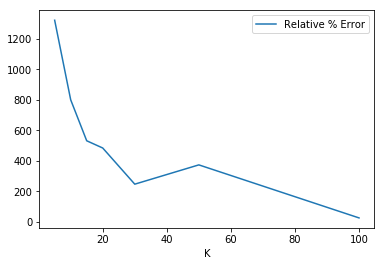

In [151]:
df.loc[(df['a0'] == 10) & (df['a1'] == 1) & (df['Mean difference'] == 8)].plot(x = 'K', y = 'Relative % Error')
